# Adonis Modeling 

### Lets Import some libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PyNomaly import loop
%matplotlib inline

In [2]:
#I was having issues importing dbscan from sklearn so I wanted to check the sklearn versions - from sklearn.cluster import DBSCAN

import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.5.
The scikit-learn version is 0.23.1.


In [3]:
# lets try once more 
from sklearn.cluster import DBSCAN

In [4]:
credit= pd.read_csv('../data/creditcard.csv')

#### Lets see What Linear Regression looks like on this data set. 

In [5]:
# Create X and y.
feature_cols = ['Time','V1','V2','V3','V4','V5','V6','V7', 'V8', 'V8', 'V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16', 'V16','V17', 'V18','V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27','V28','Amount']
X = credit[['Time','V1','V2','V3','V4','V5','V6','V7', 'V8', 'V8', 'V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16', 'V16','V17', 'V18','V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27','V28','Amount']]
y = credit.Class

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print(linreg.score(X,y))

0.0015134073052431784
[-4.39426334e-09 -1.92862035e-03  2.86900915e-03 -5.09422397e-03
  3.77396705e-03 -2.33149107e-03 -1.65970556e-03 -6.84506821e-03
  4.19349567e-04  4.19349567e-04 -3.62393138e-03 -8.09929073e-03
  6.25021700e-03 -1.07873207e-02 -2.13985211e-04 -1.31908206e-02
 -2.27611848e-04 -4.65176514e-03 -4.65176514e-03 -1.59962257e-02
 -5.57693390e-03  1.90500163e-03  2.82324487e-04  2.03985251e-03
  2.46947758e-04  1.60584609e-04 -5.15860934e-04  3.34058231e-04
  3.77638890e-04  1.67849544e-03  1.13827037e-03  7.13885807e-06]
0.5216390655775354


In [6]:
list(zip(feature_cols, linreg.coef_))

[('Time', -4.394263339783573e-09),
 ('V1', -0.0019286203457959694),
 ('V2', 0.002869009153238488),
 ('V3', -0.00509422396991826),
 ('V4', 0.0037739670542199038),
 ('V5', -0.0023314910657539828),
 ('V6', -0.0016597055625845064),
 ('V7', -0.006845068206003286),
 ('V8', 0.0004193495665260091),
 ('V8', 0.0004193495665260308),
 ('V9', -0.0036239313784805723),
 ('V10', -0.008099290733322873),
 ('V11', 0.006250216995794732),
 ('V12', -0.010787320716670904),
 ('V13', -0.00021398521080093842),
 ('V14', -0.01319082055744526),
 ('V15', -0.00022761184796522184),
 ('V16', -0.004651765138182797),
 ('V16', -0.0046517651381828016),
 ('V17', -0.015996225668436087),
 ('V18', -0.005576933895602553),
 ('V19', 0.0019050016327959794),
 ('V20', 0.0002823244873440916),
 ('V21', 0.002039852509169263),
 ('V22', 0.00024694775835982407),
 ('V23', 0.00016058460909038652),
 ('V24', -0.0005158609342933936),
 ('V25', 0.0003340582312488185),
 ('V26', 0.00037763889009507985),
 ('V27', 0.0016784954445203048),
 ('V28', 0

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict , train_test_split
from sklearn import metrics

predictors = ['Time','V1','V2','V3','V4','V5','V6','V7', 'V8', 'V8', 'V9', 'V10', 'V11', 'V12','V13', 'V14', 'V15', 'V16', 'V16','V17', 'V18','V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27','V28','Amount']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)


lr2 = LinearRegression()
lr2.fit(X_train,y_train)
lr2.score(X_test, y_test)

# iterate through folds 2-10
for folds in range(2,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))

------------------------------------

K: 2
Cross-validated scores: [0.44937311 0.52301211]
Mean CV R2: 0.4861926097651191
Std CV R2: 0.03681949879342389
Cross-Predicted R2: 0.48276386493379786
------------------------------------

K: 3
Cross-validated scores: [0.42391365 0.59512525 0.4116319 ]
Mean CV R2: 0.4768902673673591
Std CV R2: 0.08375497496829351
Cross-Predicted R2: 0.4741736307258748
------------------------------------

K: 4
Cross-validated scores: [0.34326498 0.48133241 0.6100702  0.43339939]
Mean CV R2: 0.4670167453363096
Std CV R2: 0.09632478316119575
Cross-Predicted R2: 0.4563599537954005
------------------------------------

K: 5
Cross-validated scores: [0.33895462 0.46987603 0.64058905 0.40209525 0.43514712]
Mean CV R2: 0.4573324146197466
Std CV R2: 0.10128866830016095
Cross-Predicted R2: 0.4563820025383124
------------------------------------

K: 6
Cross-validated scores: [0.32326021 0.46330592 0.43980136 0.67374798 0.41960875 0.42957986]
Mean CV R2: 0.4582173468151908

#### Looks like regression accross the different variations is giving us a steady .45 - .52 predicted score. Lets see if we can get better with other approaches. 


#### We'll figure that out a little later. Lets try a library we can actually load. (KNN) 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))


0.9981882531389568


#### Once again, looks like what we'd expect but the challenge is that this is proving data is unbalanced. Lets see if we can do something about that. 

In [21]:
#kmeans clustering with 5 clusters and 2 random states 
from sklearn.cluster import KMeans
X = credit 
km = KMeans(n_clusters=5, random_state=2)
km.fit(X)

KMeans(n_clusters=5, random_state=2)

In [18]:
km.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [19]:
credit['cluster'] = km.labels_
credit.sort_values('cluster')

Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
13351    23567.0  1.095642 -0.042501  0.276950  0.120248 -0.003353  0.137275   
13350    23567.0  1.238022  0.259048 -0.081751  0.497743  0.223220 -0.412417   
13349    23566.0  1.012413 -0.087005  1.546178  1.338721 -0.830518  0.556865   
13348    23564.0 -1.072194  0.633328  1.807059 -0.191783  1.148652 -0.790303   
...          ...       ...       ...       ...       ...       ...       ...   
240198  150480.0 -0.554910  0.714797  1.455029  0.762760  0.509384  0.275293   
240199  150481.0 -0.362464  0.877489 -0.351685  0.849001  0.469069 -0.599224   
240200  150481.0  1.946158 -1.069610 -0.833379 -0.470632 -0.453905  0.630737   
240202  150482.0 -0.267094  0.718794  1.728926 -0.539650  0.536079  0.169345   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V22       V23       V24  \
0       0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928   
13351  -0.179279  0.039570  1.073523  ...  0.116076 -0.014648 -0.262700   
13350   0.175186 -0.238450  0.906677  ... -0.321588 -0.173323 -0.361539   
13349  -0.970536  0.301680  1.679375  ...  0.800498 -0.066576 -0.037798   
13348   0.682223 -0.061106  0.733336  ... -0.522203  0.104774 -0.026992   
...          ...       ...       ...  ...       ...       ...       ...   
240198  0.280130  0.242789 -0.412477  ... -0.204137  0.033158 -0.516414   
240199  1.823910 -0.287822 -1.015682  ...  0.738177 -0.181368 -0.024032   
240200 -0.891299  0.250048 -0.081850  ... -0.128020  0.368603 -1.050408   
240202  0.662013 -0.156210  0.167174  ... -0.176727 -0.123361  0.605035   
284806  1.577006 -0.414650  0.486180  ...  0.643078  0.376777  0.008797   

             V25       V26       V27       V28  Amount  Class  cluster  
0       0.128539 -0.189115  0.133558 -0.021053  149.62      0        0  
13351   0.183686  1.037031 -0.093498 -0.016258   44.75      0        0  
13350   0.590203  0.455008 -0.093920 -0.012912   34.95      0        0  
13349   0.220397 -0.267653  0.054367  0.029088   40.96      0        0  
13348  -0.183484 -0.989103  0.068237  0.140632   19.99      0        0  
...          ...       ...       ...       ...     ...    ...      ...  
240198 -0.458048 -0.803072  0.455892  0.237854   23.98      0        4  
240199 -0.146473 -0.409964  0.083936  0.146226  144.00      0        4  
240200 -0.635701  0.655777  0.011990 -0.059275   39.19      0        4  
240202 -0.286171 -0.586688  0.004315 -0.067394    2.49      0        4  
284806 -0.473649 -0.818267 -0.002415  0.013649  217.00      0        4  

[284807 rows x 32 columns]

In [20]:
#Lets take a look at the cluster centers
km.cluster_centers_

array([[ 1.55326890e+04, -2.45093060e-01,  2.41717811e-01,
         7.45356737e-01,  2.77508884e-01, -1.64042212e-01,
         9.24000667e-02, -1.45413657e-01,  2.27344555e-02,
         6.34772894e-01, -2.19546549e-01,  6.80992178e-01,
        -1.08528935e+00,  6.79670171e-01,  5.54315819e-01,
        -4.29790176e-02, -5.15809648e-03,  2.89564756e-01,
        -4.51023090e-02, -6.57093600e-02,  3.87102730e-02,
        -4.74282801e-02, -1.46207409e-01, -3.80212148e-02,
         1.06240533e-02,  1.23170893e-01,  3.27735408e-02,
         1.45230624e-02,  7.26812213e-03,  7.03278823e+01,
         4.26043807e-03],
       [ 1.26457673e+05,  2.97969358e-01, -1.35837083e-01,
        -6.79055436e-01, -1.46171142e-01,  3.07168003e-01,
        -4.60940715e-02,  1.42821937e-01, -9.90018347e-02,
         7.12717161e-02,  6.13977113e-02, -1.99647973e-01,
        -6.08045587e-02, -1.86881697e-02, -3.00355506e-02,
        -2.15321325e-01,  2.11949874e-03, -5.11937528e-02,
         7.77563165e-02,  2.17

In [22]:
credit.groupby('cluster').mean()

Time        V1        V2        V3        V4        V5  \
cluster                                                                    
0         15586.487064 -0.245160  0.240388  0.745799  0.276470 -0.164099   
1        126452.281751  0.297761 -0.135918 -0.678996 -0.146261  0.307206   
2         76170.207089 -0.189175  0.150358  0.503291  0.101246 -0.182414   
3         45964.128578 -0.269456 -0.124060  0.658986  0.129307 -0.312342   
4        155704.169531  0.249684  0.025835 -0.742606 -0.174826  0.251851   

               V6        V7        V8        V9  ...       V21       V22  \
cluster                                          ...                       
0        0.092559 -0.145420  0.021819  0.632078  ... -0.047009 -0.145982   
1       -0.045818  0.142784 -0.098967  0.071281  ...  0.060563  0.159773   
2        0.039404 -0.097577  0.045991 -0.021672  ... -0.046429 -0.112456   
3        0.095352 -0.100752  0.063997 -0.221231  ... -0.024155 -0.093531   
4       -0.118484  0.107011 -0.022681 -0.016473  ...  0.027827  0.099132   

              V23       V24       V25       V26       V27       V28  \
cluster                                                               
0       -0.038176  0.010736  0.122831  0.032604  0.014488  0.007150   
1        0.026562 -0.020329 -0.120223 -0.044063 -0.002459 -0.000324   
2       -0.015465  0.013324  0.089111  0.019787  0.002036  0.003948   
3       -0.037322  0.008971  0.136340  0.024442 -0.002553  0.000487   
4        0.038812 -0.006373 -0.148113 -0.012247 -0.001564 -0.006344   

             Amount     Class  
cluster                        
0         70.402026  0.004245  
1         95.307799  0.001071  
2         75.903431  0.001916  
3        106.909499  0.001803  
4         81.526293  0.001330  

[5 rows x 31 columns]

In [23]:
centers = credit.groupby('cluster').mean()

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [25]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow', 'orange'])

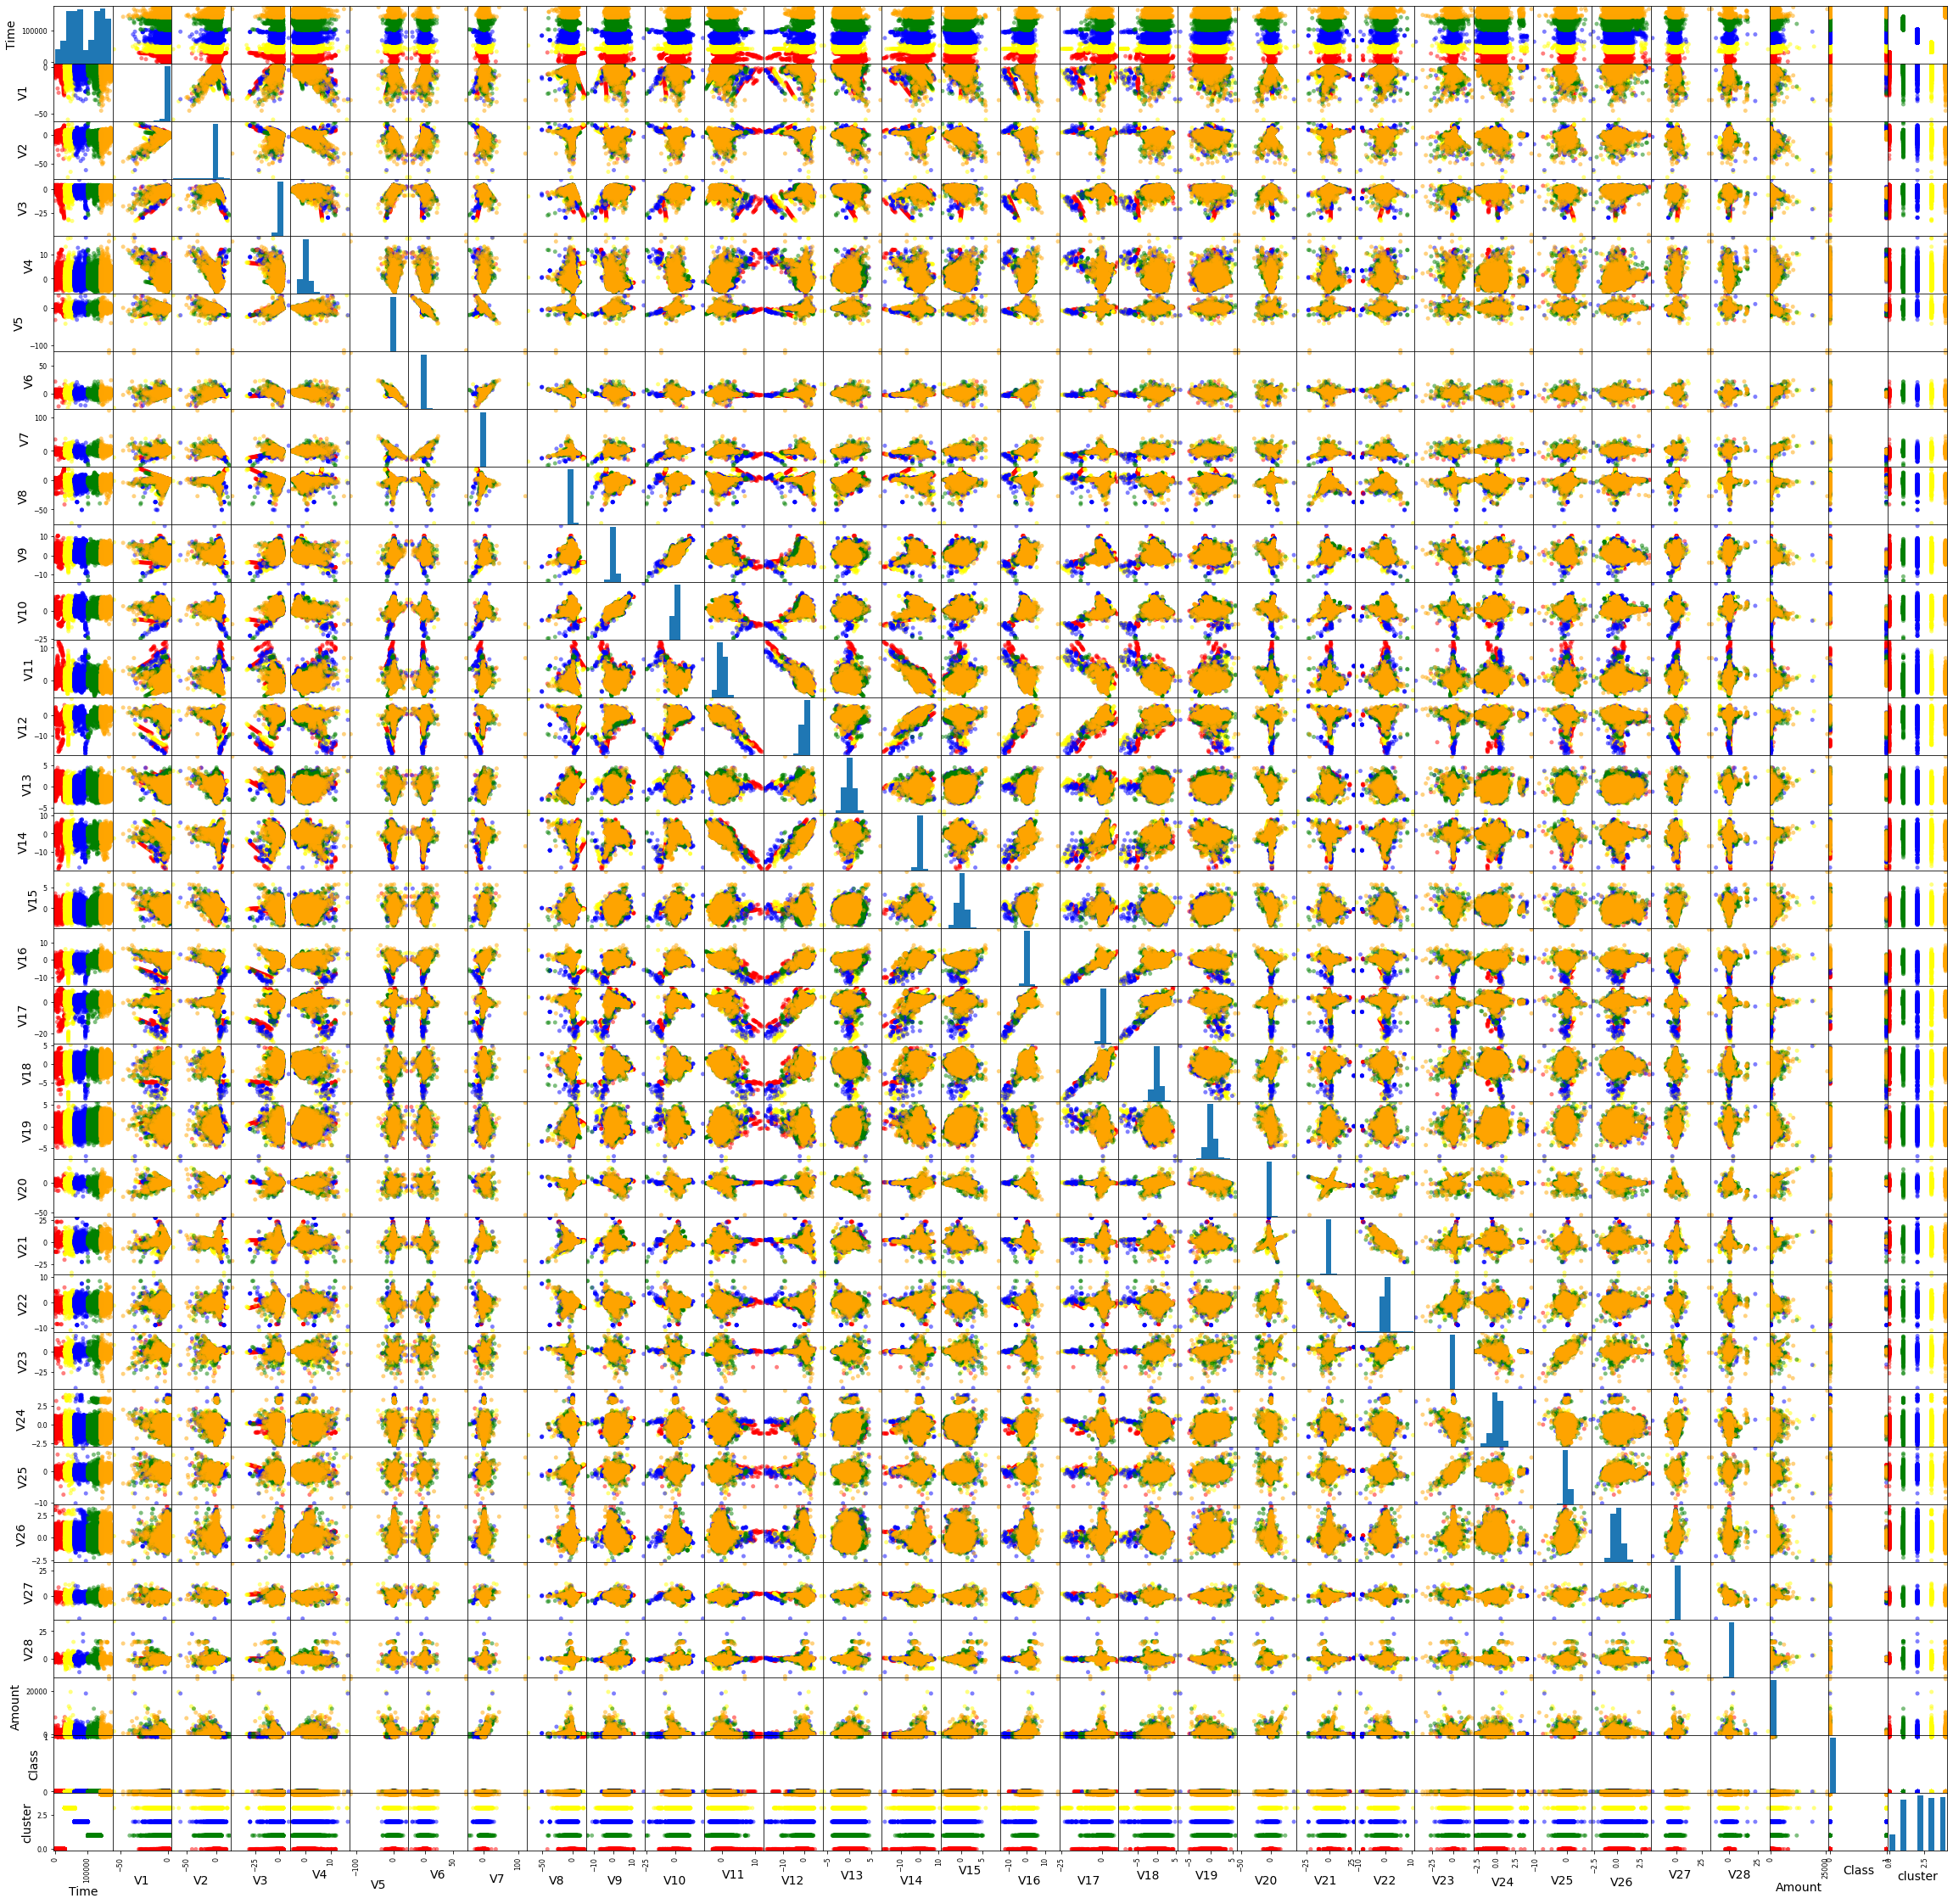

In [27]:
pd.plotting.scatter_matrix(X, c=colors[credit.cluster], figsize=(40,40), s=100);